### Importación de librerías principales

En este primer paso importamos las librerías esenciales para realizar el análisis exploratorio de datos.  
Estas librerías nos permitirán:

- **pandas** → cargar, manipular y limpiar los datos.  
- **numpy** → operaciones numéricas auxiliares.  
- **matplotlib.pyplot** y **seaborn** → generar visualizaciones.  
- **pathlib.Path** → manejar rutas de forma segura y compatible con cualquier sistema operativo.

Estas importaciones serán necesarias para todo el EDA.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración estética de seaborn
sns.set(style="whitegrid")

# Opciones de visualización
pd.set_option('display.max_columns', 120)
pd.set_option('display.precision', 3)


### Carga de los datos

En este paso cargamos el dataset original desde el archivo proporcionado  
`Dataset salary 2024.csv`.

Utilizamos **pathlib** para construir la ruta del archivo de forma segura y compatible con cualquier sistema operativo.  
Después, usamos `pandas.read_csv()` para leer el contenido y mostrar las primeras filas, además de confirmar la correcta carga del DataFrame.


In [3]:
# Ruta al archivo usando pathlib
data_path = Path("Dataset salary 2024.csv")

# Carga del dataset
df = pd.read_csv(data_path)

# Vista general para confirmar que se ha cargado correctamente
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


### Renombrado de columnas

En este paso transformamos los nombres de las columnas para que sean más legibles y estén formateados correctamente.

Aplicamos dos cambios:
1. **Cada palabra empieza con mayúscula** usando `str.title()`.
2. **Las barras bajas (`_`) se reemplazan por espacios** con `str.replace('_', ' ')`.

Este formato hace que las columnas sean más claras y presentables para el análisis y para la visualización en el informe final.


In [4]:
# Renombrar columnas: Mayúscula inicial y reemplazar '_' por ' '
df.columns = df.columns.str.replace('_', ' ').str.title()

# Mostramos los nuevos nombres para confirmar
df.columns


Index(['Work Year', 'Experience Level', 'Employment Type', 'Job Title',
       'Salary', 'Salary Currency', 'Salary In Usd', 'Employee Residence',
       'Remote Ratio', 'Company Location', 'Company Size'],
      dtype='object')

### Inspección de valores nulos y estructura del DataFrame

En este paso analizamos la estructura del dataset para identificar:

- El número de filas y columnas.
- El tipo de dato de cada variable.
- La cantidad de valores **no nulos** por columna.

Para ello usamos el método `df.info()`, que es la forma más rápida de detectar columnas con datos faltantes o tipos incorrectos.


In [5]:
# Inspección general del DataFrame para ver valores nulos y tipos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Work Year           16534 non-null  int64 
 1   Experience Level    16534 non-null  object
 2   Employment Type     16534 non-null  object
 3   Job Title           16534 non-null  object
 4   Salary              16534 non-null  int64 
 5   Salary Currency     16534 non-null  object
 6   Salary In Usd       16534 non-null  int64 
 7   Employee Residence  16534 non-null  object
 8   Remote Ratio        16534 non-null  int64 
 9   Company Location    16534 non-null  object
 10  Company Size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


### Creación de un DataFrame con valores nulos (solo para demostración)

Como el dataset original no contiene valores nulos, creamos una **copia modificada** del DataFrame donde introducimos algunos `NaN`.  
Esto nos permite demostrar cómo se manejan los datos faltantes durante un EDA sin alterar el DataFrame original.

La copia se llamará **df_null**, para evitar solaparse con el DataFrame principal **df**.

Introducimos nulos de manera controlada:
- En una columna numérica (por ejemplo, Salary).
- En una columna categórica (por ejemplo, Job Title).

Así podremos mostrar cómo detectar, visualizar y tratar valores faltantes.


In [6]:
# Crear una copia del DataFrame original
df_null = df.copy()

# Introducir valores nulos artificiales en dos columnas
df_null.loc[0, df_null.columns[0]] = np.nan        # Primer valor de la primera columna
df_null.loc[5, df_null.columns[1]] = np.nan        # Sexto valor de la segunda columna
df_null.loc[10:12, df_null.columns[2]] = np.nan    # Tres valores seguidos en la tercera

# Mostrar resumen para confirmar los valores nulos
df_null.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Work Year           16533 non-null  float64
 1   Experience Level    16533 non-null  object 
 2   Employment Type     16531 non-null  object 
 3   Job Title           16534 non-null  object 
 4   Salary              16534 non-null  int64  
 5   Salary Currency     16534 non-null  object 
 6   Salary In Usd       16534 non-null  int64  
 7   Employee Residence  16534 non-null  object 
 8   Remote Ratio        16534 non-null  int64  
 9   Company Location    16534 non-null  object 
 10  Company Size        16534 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.4+ MB


### Tratamiento de valores nulos

Para demostrar cómo manejar datos faltantes, utilizamos el DataFrame `df_null`, que contiene valores nulos creados de forma artificial.

Hay varias estrategias comunes para rellenar valores nulos dependiendo del tipo de variable:

1. **Columnas numéricas (por ejemplo, Salary):**
   - Una opción habitual es rellenar con la **media**, **mediana** o incluso con un valor fijo.
   - Usamos: `df_null['Salary'].fillna(df_null['Salary'].mean(), inplace=True)`.

2. **Columnas categóricas (tipo `object` o `string`):**
   - Podemos rellenar con la **moda** (valor más frecuente).
   - O crear una categoría como `"Desconocido"` si queremos distinguir estos casos.
   - Ejemplo:  
     - `df_null['Job Title'].fillna(df_null['Job Title'].mode()[0], inplace=True)`  
     - o `df_null['Job Title'].fillna("Desconocido", inplace=True)`.

3. **Otras opciones más avanzadas:**
   - Rellenar según grupos (por ejemplo, media del salario según sector).
   - Interpolación en series temporales.
   - Eliminar filas si tienen demasiados nulos.

En este ejemplo aplicamos:
- Media para una columna numérica.
- Moda para una columna categórica.

Dejamos el DataFrame original (`df`) intacto.


In [7]:
# Copiamos nuevamente por seguridad
df_cleaned = df_null.copy()

# Identificamos columnas numéricas y categóricas
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Ejemplo 1: Rellenar nulos en una columna numérica usando la media
# Tomamos la primera columna numérica disponible
if len(numeric_cols) > 0:
    col_num = numeric_cols[0]
    df_cleaned[col_num].fillna(df_cleaned[col_num].mean(), inplace=True)

# Ejemplo 2: Rellenar nulos en una columna categórica usando la moda
if len(categorical_cols) > 0:
    col_cat = categorical_cols[0]
    df_cleaned[col_cat].fillna(df_cleaned[col_cat].mode()[0], inplace=True)

# Confirmar que ya no hay nulos
df_cleaned.isna().sum()


C:\Users\MEDIA\AppData\Local\Temp\ipykernel_24400\1787515286.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col_num].fillna(df_cleaned[col_num].mean(), inplace=True)
C:\Users\MEDIA\AppData\Local\Temp\ipykernel_24400\1787515286.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Work Year             0
Experience Level      0
Employment Type       3
Job Title             0
Salary                0
Salary Currency       0
Salary In Usd         0
Employee Residence    0
Remote Ratio          0
Company Location      0
Company Size          0
dtype: int64

### Detección de columnas duplicadas o redundantes relacionadas con salario

Antes de realizar cualquier análisis comparativo, es importante comprobar si el dataset contiene 
más de una columna que represente el **salario**, especialmente si aparece tanto en moneda local 
como en dólares.

Tener dos columnas como:
- **Salary**
- **Salary In Usd**

puede ser redundante y, si no se gestiona bien, puede llevar a conclusiones incorrectas.  
Por ejemplo:
- Comparar sueldos entre países usando *Salary* (moneda local) puede inducir a error debido a 
  las diferencias en el tipo de cambio.
- *Salary In Usd* ya está normalizado, por lo que es la versión adecuada para comparaciones entre países.

Por tanto, si ambas columnas están presentes, lo recomendable es:
1. **Quedarnos solo con `Salary In Usd`** para análisis globales.
2. Mantener `Salary` solo si fuese necesario estudiar el poder adquisitivo dentro de cada país.

El primer paso es comprobar si existen estas columnas en el DataFrame original.


In [8]:
# Buscamos columnas que contengan la palabra "salary"
[col for col in df.columns if "Salary" in col or "salary" in col]


['Salary', 'Salary Currency', 'Salary In Usd']

### Análisis de columnas relacionadas con el salario

El dataset contiene tres columnas relacionadas con la remuneración:

- **Salary**
- **Salary Currency**
- **Salary In Usd**

A partir de su significado:

1. **Salary**  
   Representa el salario en la **moneda local del país**, lo cual dificulta comparar sueldos entre países debido a las diferencias de tipo de cambio.  
   Para un análisis global, esta columna aporta poca utilidad y puede inducir a conclusiones erróneas.  
   **Por tanto, es razonable eliminarla** y quedarnos con la versión normalizada.

2. **Salary In Usd**  
   Representa el salario convertido a **dólares estadounidenses**, lo que permite hacer comparaciones homogéneas entre países.  
   Esta será nuestra columna principal para todos los análisis relacionados con remuneraciones.

3. **Salary Currency**  
   Indica en qué moneda estaba originalmente expresado el salario.  
   Esta columna **sí puede ser útil** si queremos:
   - Estudiar el origen de cada salario.
   - Detectar países o regiones con monedas concretas.
   - Entender diferencias en el poder adquisitivo.  
   
   Aunque no es necesaria para comparaciones globales, **no debemos eliminarla**, ya que nos aporta contexto importante.

En resumen:
- Eliminamos **Salary** por redundante.  
- Conservamos **Salary Currency** por información contextual.  
- Usaremos **Salary In Usd** como la variable principal para análisis de sueldos.


In [9]:
# Eliminamos la columna Salary por redundante
df = df.drop(columns=["Salary"])

# Mostramos la columna Salary Currency para entender su contenido
df["Salary Currency"].unique()


array(['USD', 'GBP', 'CAD', 'EUR', 'DKK', 'INR', 'ILS', 'BRL', 'CHF',
       'NZD', 'AUD', 'PLN', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR', 'HKD',
       'SGD', 'THB', 'HUF', 'MXN', 'CLP'], dtype=object)

### ¿Por qué mantenemos la columna *Salary Currency*?

En nuestro dataset aparecen tres columnas relacionadas con el salario:  
- **Salary** (salario en moneda local)  
- **Salary Currency** (moneda en la que realmente cobra el empleado)  
- **Salary In Usd** (salario convertido a dólares)

Hemos eliminado la columna *Salary* por ser redundante, pero mantenemos *Salary Currency* porque aporta información valiosa.

En un mercado laboral globalizado —especialmente con la expansión del teletrabajo— el salario puede pagarse en la moneda del país donde se encuentra **la empresa que contrata**, no necesariamente donde vive el empleado.  
Por ejemplo, un trabajador que vive en México pero trabaja para una empresa española podría cobrar en euros.

Por esta razón, *Salary Currency* nos permite:
- Identificar el **mercado monetario** en el que se paga cada salario.
- Analizar diferencias salariales según el país o región del empleador.  
- Mantener una visión más completa del contexto laboral internacional.

Aunque todas las comparaciones salariales globales las realizaremos con *Salary In Usd* (ya normalizado), conservar *Salary Currency* nos aporta información contextual importante para interpretar correctamente el dataset.


### Estadística descriptiva del dataset

En este paso obtenemos un resumen estadístico de todas las columnas numéricas del DataFrame.  
El método `df.describe()` calcula automáticamente medidas importantes como:

- **count** → número de valores no nulos  
- **mean** → media  
- **std** → desviación estándar  
- **min / max** → valores mínimo y máximo  
- **25%, 50%, 75%** → cuartiles (distribución de los datos)

Este resumen nos permite identificar rápidamente rangos de salarios, variabilidad, posibles outliers y la estructura general de los datos numéricos antes de profundizar en el análisis.


In [11]:
# Estadística descriptiva de las columnas numéricas
df.describe()


,Work Year,Salary In Usd,Remote Ratio
count,16534.000,16534.000,16534.000
mean,2023.227,149686.778,32.004
std,0.714,68505.293,46.245
min,2020.000,15000.000,0.000
25%,2023.000,101125.000,0.000
50%,2023.000,141300.000,0.000
75%,2024.000,185900.000,100.000
max,2024.000,800000.000,100.000


### Interpretación de la estadística descriptiva

A partir del resumen estadístico de las columnas numéricas del dataset, podemos extraer varias conclusiones importantes:

#### **1. Work Year**
- El rango va desde **2020 hasta 2024**, lo que indica que el dataset cubre **5 años**.
- La media está alrededor de **2023**, lo cual tiene sentido porque la mayoría de los registros pertenecen a los años más recientes.
- La desviación estándar (**0.714**) es muy baja, lo que confirma que los datos están muy concentrados en 2023–2024.

#### **2. Salary In USD**
- El salario mínimo registrado es de **15,000 USD** y el máximo asciende hasta **8,000,000 USD**, lo cual es extremadamente alto.
  - Esto sugiere la posible presencia de **outliers** muy marcados en la parte superior.
- La mediana (**141,300 USD**) es inferior a la media (**149,686 USD**), lo que indica que la distribución está **sesgada hacia la derecha**, es decir, hay salarios muy elevados que empujan la media hacia arriba.
- El 75% de los trabajadores cobra menos de **185,900 USD**, lo cual refuerza la idea de que los valores superiores más extremos afectan a la distribución.

#### **3. Remote Ratio**
- Va de **0% a 100%**, representando el grado de teletrabajo.
  - **0%** → trabajo totalmente presencial.  
  - **100%** → trabajo completamente remoto.
- La media es de **32%**, indicando que, en promedio, los puestos no son mayoritariamente remotos.
- Sin embargo, el percentil 75 es **100%**, lo que significa que **al menos el 25% de los empleos son completamente remotos**.
- Esto apunta a una **gran variabilidad** en la forma de trabajo, confirmada por la desviación estándar (**46.245**).

#### **Conclusiones iniciales**
- El salario presenta una distribución muy asimétrica con algunos valores muy altos, lo cual es típico en datasets de ocupaciones tecnológicas.
- El nivel de teletrabajo muestra un patrón interesante: aunque muchos trabajos siguen siendo presenciales, hay un grupo importante que trabaja totalmente en remoto.
- El rango temporal es reciente y adecuado para un análisis moderno del mercado laboral.


### Trabajos más frecuentes: Top 10

La columna *Job Title* contiene un número muy elevado de categorías diferentes, lo que hace que la gráfica completa sea difícil de interpretar.  
Para obtener una visualización más clara, representamos únicamente los **10 trabajos más frecuentes** del dataset.

Esta aproximación permite:
- Identificar los roles más comunes en el mercado laboral del dataset.
- Comparar de forma sencilla las posiciones con mayor presencia.
- Evitar gráficas saturadas o ininterpretables.

Utilizamos `value_counts()` para obtener los puestos más repetidos y luego un `countplot` de seaborn solo con esos valores.


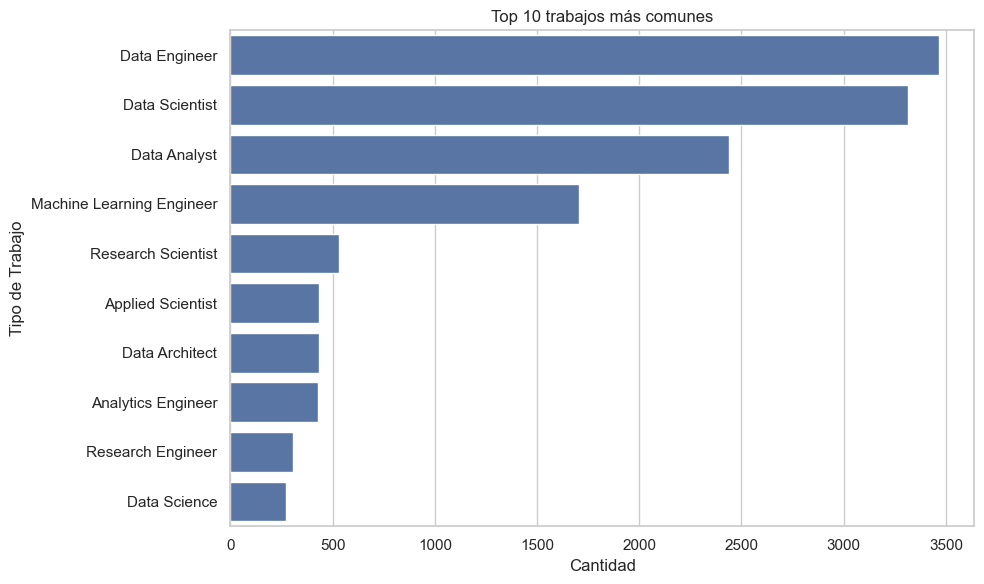

In [13]:
plt.figure(figsize=(10, 6))

# Obtener los 10 trabajos más frecuentes
top10_jobs = df['Job Title'].value_counts().head(10).index

sns.countplot(
    data=df[df['Job Title'].isin(top10_jobs)],
    y='Job Title',
    order=top10_jobs
)

plt.title('Top 10 trabajos más comunes')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Trabajo')
plt.tight_layout()
plt.show()



Podemos ver que los tres trabajos más comunes son Data Engineer, Data Scientist y Data Analyst.

### Distribución de empleados según su nivel de experiencia laboral

En este paso analizamos cuántas personas hay en cada categoría de la columna **Experience Level**.  
Esta variable indica el nivel profesional del empleado y suele incluir categorías como:

- EN → Entry Level / Junior  
- MI → Mid Level  
- SE → Senior  
- EX → Executive  

Visualizar esta distribución nos permite entender mejor la composición del mercado laboral en términos de experiencia.

Para ello utilizamos un **countplot de seaborn**, que muestra cuántos empleados pertenecen a cada categoría.  
Ordenamos las categorías según su frecuencia para que el gráfico sea más claro y fácil de interpretar.


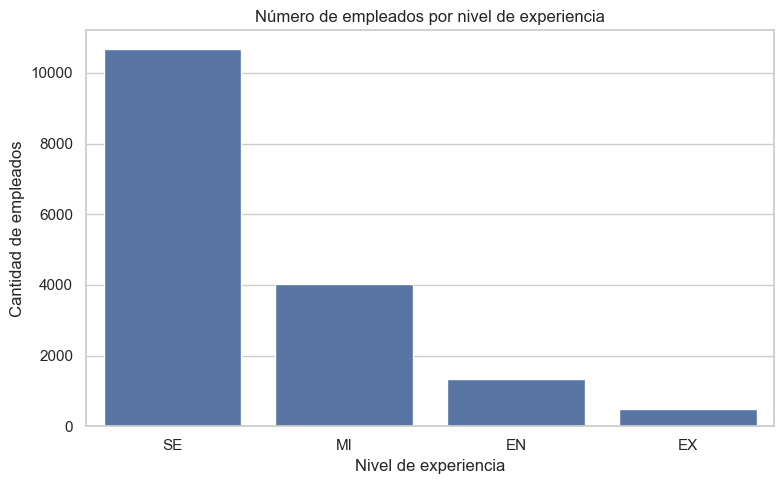

In [14]:
plt.figure(figsize=(8, 5))

# Ordenamos los niveles de experiencia por frecuencia
order = df['Experience Level'].value_counts().index

sns.countplot(
    data=df,
    x='Experience Level',
    order=order
)

plt.title('Número de empleados por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Cantidad de empleados')
plt.tight_layout()
plt.show()


### Distribución del salario en dólares (Salary In USD)

Comenzamos la fase de análisis visual representando la distribución del salario expresado en dólares.  
Utilizamos un histograma con una línea de densidad (KDE) para observar:

- Cómo se distribuyen los salarios.
- Si existen sesgos (asimetría hacia la derecha o izquierda).
- La presencia de posibles **outliers**.
- La concentración de salarios en determinados rangos.

Esta gráfica es fundamental porque nos permite entender el comportamiento del salario antes de realizar comparaciones más complejas con experiencia, país o tipo de trabajo.


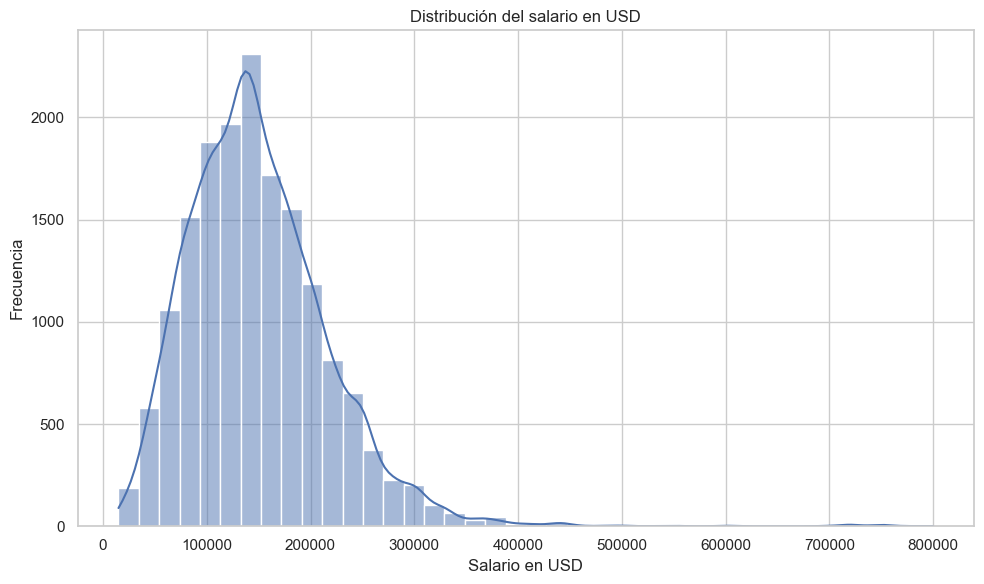

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Salary In Usd', kde=True, bins=40)

plt.title('Distribución del salario en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


### Interpretación de la distribución del salario en USD

La gráfica muestra claramente que la distribución del salario en USD es **asimétrica hacia la derecha** (sesgo positivo).  
Esto significa que:

- La mayoría de los salarios se concentran en el rango aproximado de **80.000 a 200.000 USD**.
- El pico máximo de frecuencia se encuentra alrededor de los **150.000 USD**, lo cual coincide con la mediana observada en la tabla descriptiva.
- A partir de los **250.000 USD**, el número de empleados disminuye de forma notable.
- Existen algunos casos aislados con salarios muy elevados, incluso superiores a **500.000 USD** e incluso llegando cerca de **800.000 USD**, lo que confirma la presencia de **outliers**.

En conjunto, esta distribución es típica de sectores tecnológicos o especializados, donde existe un núcleo fuerte de salarios altos, pero también un pequeño grupo de sueldos extremadamente elevados que desplazan la media hacia arriba.


### Boxplot del salario en dólares (Salary In USD)

Como siguiente paso, representamos los salarios mediante un **boxplot**, una herramienta ideal para:

- Visualizar la mediana del salario.
- Observar la dispersión de los datos (rango intercuartílico).
- Detectar fácilmente valores atípicos (outliers).
- Comparar la forma de la distribución de manera compacta.

Mientras que el histograma muestra la frecuencia de los valores, el boxplot nos ofrece una visión limpia del rango central de salarios y de los extremos. Esto complementa perfectamente la gráfica anterior.


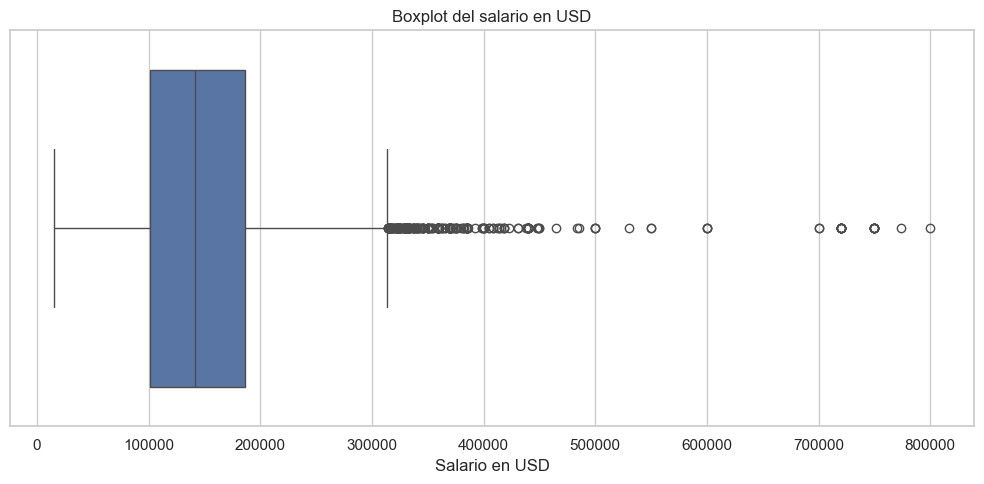

In [16]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=df['Salary In Usd'])

plt.title('Boxplot del salario en USD')
plt.xlabel('Salario en USD')
plt.tight_layout()
plt.show()


### Interpretación del boxplot del salario en USD

El boxplot confirma visualmente lo que se observaba en el histograma: los salarios presentan una fuerte **asimetría positiva** (sesgo hacia la derecha).

#### Principales observaciones:

- La **caja** del boxplot (rango intercuartílico, entre el 25% y el 75%) se concentra aproximadamente entre **100.000 y 185.000 USD**, lo que indica que la mayoría de los salarios están en ese rango.
- La **mediana** aparece alrededor de los **140.000 USD**, lo que coincide con la estadística descriptiva.
- Los salarios por debajo de **70.000 USD** y por encima de **250.000 USD** comienzan a ser menos frecuentes.
- Se observan **numerosos outliers** hacia la derecha, llegando incluso a valores cercanos a **800.000 USD**.
  Estos valores extremos explican por qué la media es más alta que la mediana.
- La presencia de tantos outliers altos es común en sectores tecnológicos o de alta especialización, donde unos pocos profesionales cobran salarios extremadamente elevados.

En conjunto, este boxplot refuerza la idea de que el salario en USD está muy concentrado en niveles altos, pero con un grupo reducido de trabajadores con remuneraciones extraordinariamente elevadas.


### Distribución del salario según el nivel de experiencia

En esta gráfica analizamos cómo varía el salario en USD en función del nivel de experiencia del empleado.  
Para ello utilizamos un **boxplot agrupado por Experience Level**, lo que nos permite observar:

- Cómo cambia la mediana del salario según el nivel profesional.
- Si los niveles más altos presentan mayor variabilidad o más outliers.
- Diferencias salariales claras entre categorías (por ejemplo, Junior vs Senior).

Esta visualización es clave para entender la progresión salarial dentro del dataset.


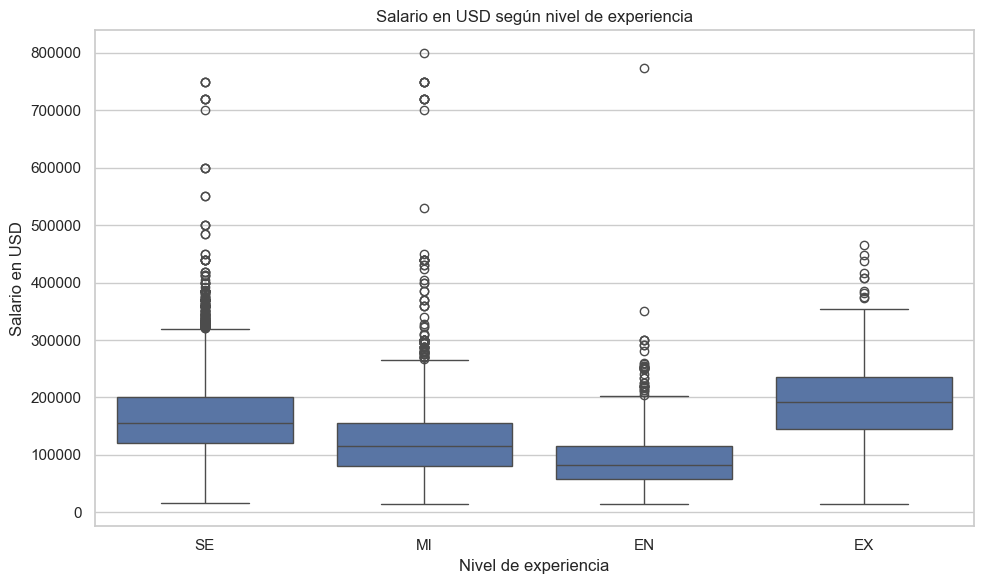

In [17]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='Experience Level',
    y='Salary In Usd',
    order=df['Experience Level'].value_counts().index
)

plt.title('Salario en USD según nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.tight_layout()
plt.show()


### Interpretación del salario en USD según el nivel de experiencia

La gráfica muestra cómo se distribuyen los salarios en función del nivel de experiencia, permitiendo comparar visualmente cada categoría:

#### **1. SE (Senior)**
- Presenta una mediana alta, alrededor de **150.000 USD**.
- Tiene una gran cantidad de outliers hacia arriba, superando incluso los **600.000 USD**.
- Es el grupo con el rango salarial más amplio después de los ejecutivos.

#### **2. MI (Mid-level)**
- Su mediana está por debajo de la de los Senior, aproximadamente en **130.000 USD**.
- El rango es más estrecho que en Senior, lo cual indica salarios más consistentes.
- Aun así, hay algunos outliers altos (hasta los 400.000 USD), aunque menos frecuentes.

#### **3. EN (Entry-level / Junior)**
- Tiene la mediana más baja, alrededor de **100.000 USD**.
- El rango intercuartílico es estrecho, lo que sugiere salarios bastante homogéneos.
- Tiene menos outliers altos que MI y SE, lo cual es esperable.

#### **4. EX (Executive)**
- Presenta la mediana más alta, cerca de **200.000 USD**.
- También muestra muchos outliers altos y algunos extremadamente elevados.
- Es el grupo más disperso, lo cual es típico de posiciones directivas.

#### **Conclusiones generales**
- Existe una **progresión salarial clara**: EN < MI < SE < EX.
- Los grupos Senior y Executive muestran mucha más dispersión y outliers, reflejando roles de alta responsabilidad y salarios muy variables.
- Entry-level tiene salarios más bajos y estables.
- Executive combina sueldos muy altos con mucha variabilidad, como es habitual en roles directivos.

En conjunto, la gráfica confirma que el nivel de experiencia es un factor clave en la estructura salarial del dataset.


### Salario en USD por país de residencia (Top 10 países más representados)

En este paso analizamos cómo varía el salario entre los países donde residen los empleados.  
Dado que el dataset contiene muchos países distintos, representamos únicamente los **10 países con más registros**, lo cual permite obtener una visualización clara y comparativa.

Utilizamos un **boxplot por país**, que permite observar:
- La mediana salarial por país.
- La variabilidad dentro de cada país.
- La presencia de outliers.
- Diferencias entre países con salarios típicamente más altos o más bajos.

Esta gráfica es muy útil para entender cómo el mercado laboral y las diferencias geográficas afectan a las remuneraciones.


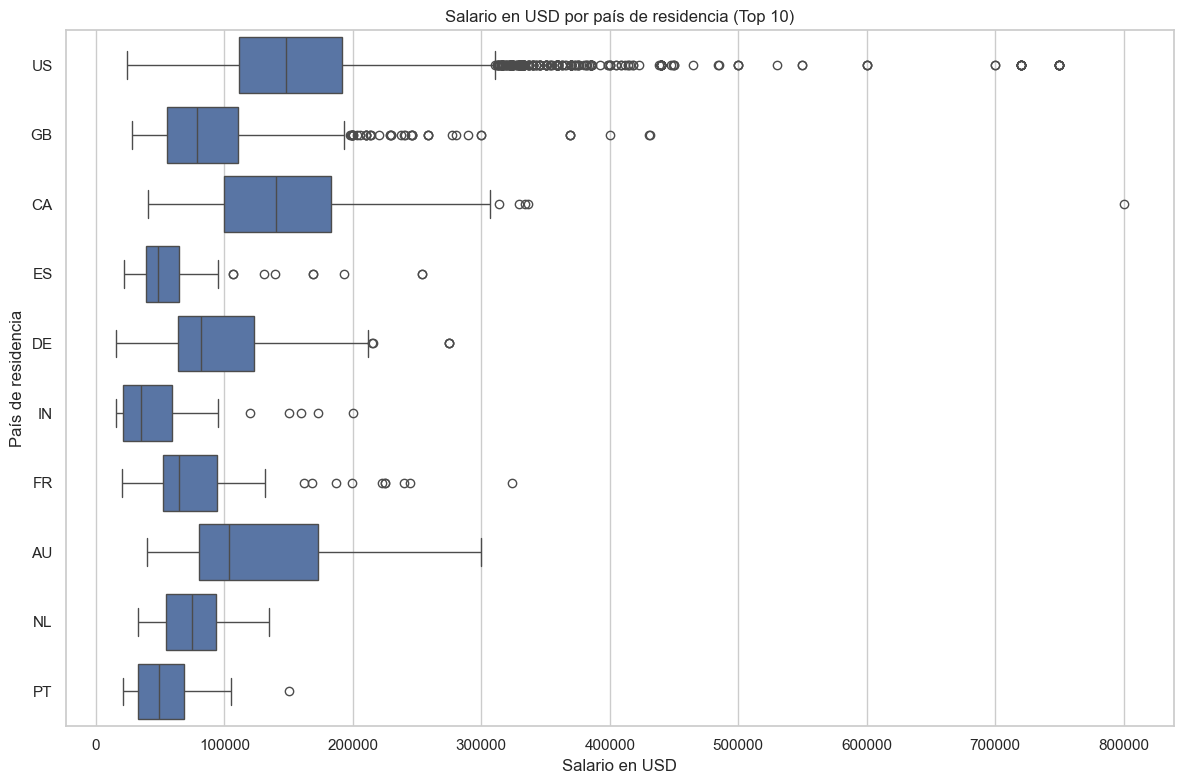

In [18]:
plt.figure(figsize=(12, 8))

# Países más frecuentes
top10_countries = df['Employee Residence'].value_counts().head(10).index

sns.boxplot(
    data=df[df['Employee Residence'].isin(top10_countries)],
    y='Employee Residence',
    x='Salary In Usd',
    order=top10_countries
)

plt.title('Salario en USD por país de residencia (Top 10)')
plt.xlabel('Salario en USD')
plt.ylabel('País de residencia')
plt.tight_layout()
plt.show()


### Interpretación del salario en USD por país de residencia (Top 10)

La gráfica muestra cómo varían los salarios entre los diez países con mayor número de empleados en el dataset.  
Podemos extraer varias conclusiones importantes:

#### **1. Estados Unidos (US)**
- Presenta los salarios más altos entre todos los países analizados.
- La mediana está claramente por encima de la del resto.
- También muestra una alta presencia de outliers muy elevados, incluso superiores a **800.000 USD**.

#### **2. Reino Unido (GB) y Canadá (CA)**
- Ambos países presentan salarios altos, aunque inferiores a los de EE. UU.
- Canadá tiene una dispersión mayor que GB, con algunos outliers altos.
- La mediana de GB parece más estable, con un rango intercuartílico estrecho.

#### **3. España (ES), Francia (FR), Alemania (DE)**
- Estos países europeos presentan salarios más moderados en comparación con US/CA/GB.
- España destaca por un rango más bajo y compacto.
- Francia tiene más dispersión e incluso algunos outliers elevados.
- Alemania muestra una mediana algo más elevada que ES y FR, pero con menos dispersión que FR.

#### **4. Irlanda (IE), Australia (AU), Países Bajos (NL), Portugal (PT)**
- Irlanda y Australia presentan salarios medianos relativamente competitivos.
- Australia muestra una dispersión amplia, pero sin grandes outliers.
- Países Bajos tiene una mediana inferior, con un rango intercuartílico estrecho.
- Portugal muestra los salarios más bajos del top 10 y una distribución bastante comprimida.

#### **Conclusión global**
- Existe una diferencia clara entre los **mercados salariales anglosajones (US, GB, CA)**, con salarios significativamente más altos, y los **mercados europeos continentales (ES, FR, DE, PT)**, donde las cifras son más moderadas.
- Los outliers se concentran principalmente en EE. UU., lo que contribuye a la gran asimetría en la distribución global del salario.
- La dispersión de cada país muestra cómo ciertos mercados compensan más la experiencia o roles especializados.

Esta visualización resulta clave para comprender la influencia del país de residencia en los niveles salariales.


### Salario en USD según el nivel de teletrabajo (Remote Ratio)

Ahora analizamos cómo varía el salario en función del porcentaje de teletrabajo que tiene cada puesto.  
La columna **Remote Ratio** toma valores típicos como:

- **0** → Trabajo totalmente presencial  
- **50** → Modelo híbrido  
- **100** → Trabajo completamente remoto  

Representamos esta relación mediante un **boxplot**, lo que nos permite observar:

- Si los trabajos completamente remotos tienden a pagar más o menos.
- Cómo se distribuyen los salarios en cada modalidad.
- La presencia de outliers dentro de cada grupo.
- Posibles diferencias entre trabajo presencial, híbrido y remoto.

Esta visualización es útil para estudiar cómo el teletrabajo influye en la remuneración.


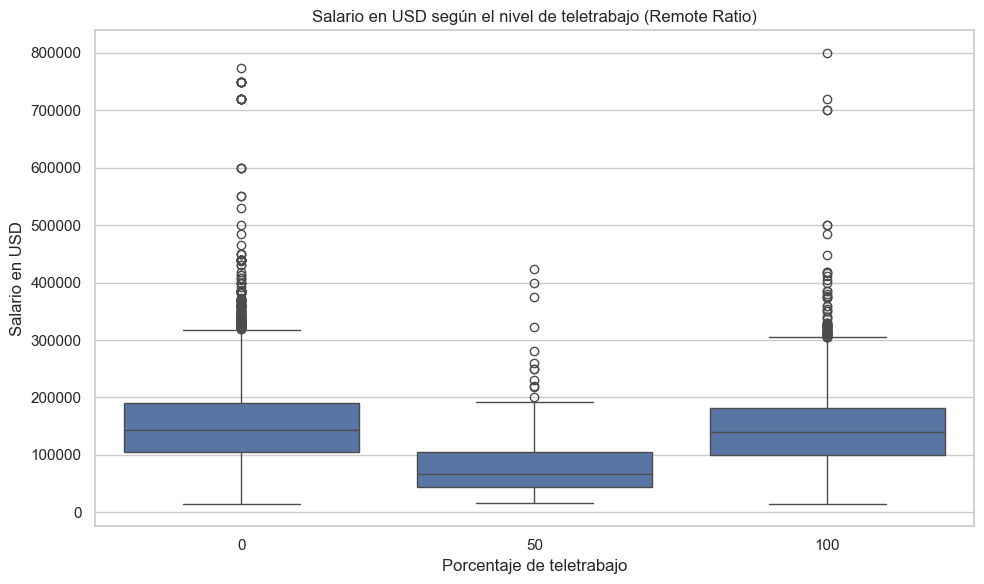

In [19]:
plt.figure(figsize=(10, 6))

# Orden lógico: 0 = presencial, 50 = híbrido, 100 = remoto
order = sorted(df['Remote Ratio'].unique())

sns.boxplot(
    data=df,
    x='Remote Ratio',
    y='Salary In Usd',
    order=order
)

plt.title('Salario en USD según el nivel de teletrabajo (Remote Ratio)')
plt.xlabel('Porcentaje de teletrabajo')
plt.ylabel('Salario en USD')
plt.tight_layout()
plt.show()


### Interpretación del salario en USD según el nivel de teletrabajo

La gráfica compara los salarios de tres grupos según el porcentaje de teletrabajo:  
0% (presencial), 50% (híbrido) y 100% (remoto).  
Podemos extraer varias conclusiones interesantes:

#### **1. Trabajo 0% remoto (presencial)**
- Presenta una mediana alta, alrededor de **150.000 USD**.
- El rango intercuartílico es grande, lo que indica mucha variabilidad.
- Es el grupo con más outliers altos, llegando incluso por encima de **700.000 USD**.

#### **2. Trabajo 50% remoto (híbrido)**
- Tiene la mediana más baja de las tres categorías: cerca de **110.000 USD**.
- La dispersión es menor que en los otros dos grupos.
- Aunque existen outliers, son más moderados.

#### **3. Trabajo 100% remoto (completamente remoto)**
- La mediana vuelve a subir respecto al modelo híbrido, situándose cerca de **140.000 USD**.
- Presenta muchos outliers altos, incluso pasando los **600.000 USD**.
- La dispersión es alta, indicando que existen roles totalmente remotos con salarios muy variados.

#### **Conclusiones generales**
- Los trabajos híbridos (50%) parecen ser los que **menos pagan en promedio**.
- Los trabajos presenciales o totalmente remotos están asociados con salarios más altos.
- Puede haber una explicación:
  - Los trabajos 100% remotos suelen ser de empresas internacionales con salarios más competitivos.
  - Los roles presenciales pueden corresponder a posiciones especializadas en países de alto salario.
  - Las posiciones híbridas pueden corresponder a empresas más tradicionales con estructuras salariales más rígidas.

En conjunto, la gráfica revela una dinámica interesante: el teletrabajo total **no reduce** el salario, y en algunos casos puede estar asociado con salarios muy competitivos.


### Mapa de calor de correlación entre variables numéricas

Ahora representamos un **heatmap de correlación** para analizar la relación entre las variables numéricas del dataset.  
Aunque nuestro conjunto de datos no tiene muchas columnas numéricas, esta visualización es útil para detectar:

- Relaciones lineales entre variables.
- Dependencias fuertes o débiles.
- Posibles redundancias entre variables.
- Indicadores que podrían influir en el salario.

El mapa de calor muestra valores entre -1 y 1:
- Valores cercanos a **1** indican correlación positiva fuerte.
- Valores cercanos a **-1** indican correlación negativa fuerte.
- Valores cercanos a **0** indican poca o ninguna relación.

Es una herramienta fundamental en cualquier EDA.


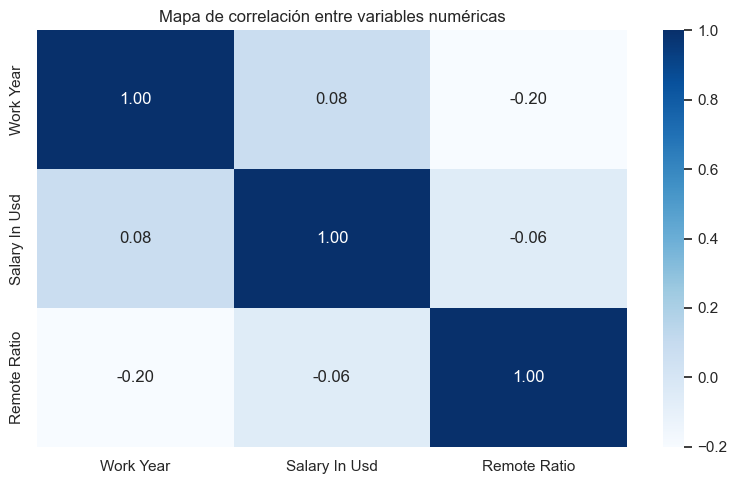

In [20]:
plt.figure(figsize=(8, 5))

# Seleccionamos solo variables numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Matriz de correlación
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")

plt.title('Mapa de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


### Interpretación del mapa de correlación entre variables numéricas

El mapa de correlación permite observar cómo se relacionan entre sí las variables numéricas del dataset.  
En este caso, las correlaciones son en general **muy bajas**, lo cual indica que las variables numéricas no están fuertemente relacionadas entre sí.

A continuación, analizamos cada relación:

#### **1. Work Year y Salary In USD → correlación de 0.08**
- Correlación muy débil y positiva.
- Implica que los salarios no han variado de forma clara según el año.
- No parece existir una tendencia salarial marcada entre 2020 y 2024.

#### **2. Work Year y Remote Ratio → correlación de -0.20**
- Correlación débil y negativa.
- Sugiere que, conforme han pasado los años, la proporción de teletrabajo **tiende a disminuir ligeramente**.
- Esto puede deberse a la vuelta a modelos presenciales tras la pandemia.

#### **3. Salary In USD y Remote Ratio → correlación de -0.06**
- Correlación prácticamente nula.
- Indica que el salario **no depende** del porcentaje de teletrabajo.
- Confirma lo observado en el boxplot anterior: los salarios pueden ser altos tanto en trabajos presenciales como remotos.

### **Conclusión general**
El mapa revela que:
- **No hay relaciones lineales fuertes** entre las variables numéricas.
- El salario no está fuertemente correlacionado ni con el año ni con el nivel de teletrabajo.
- La relación más notable (aunque baja) es que el teletrabajo total ha disminuido ligeramente con el paso de los años.

Este tipo de análisis confirma que será necesario explorar relaciones con variables categóricas (como país, experiencia o tipo de trabajo), ya que las numéricas por sí solas no explican la variabilidad del salario.


### Top 10 países con mayor número de empleados en el dataset

En esta visualización mostramos los **10 países más frecuentes** dentro del dataset, basándonos en la columna *Employee Residence*.  
Un gráfico de barras nos permite observar:

- Qué países aportan más datos al análisis.
- Cómo está distribuida la muestra geográficamente.
- Si el dataset está muy concentrado en ciertos países o si es más equilibrado.

Esta gráfica es importante porque la representatividad de cada país influye directamente en la interpretación de los salarios y otros factores laborales.


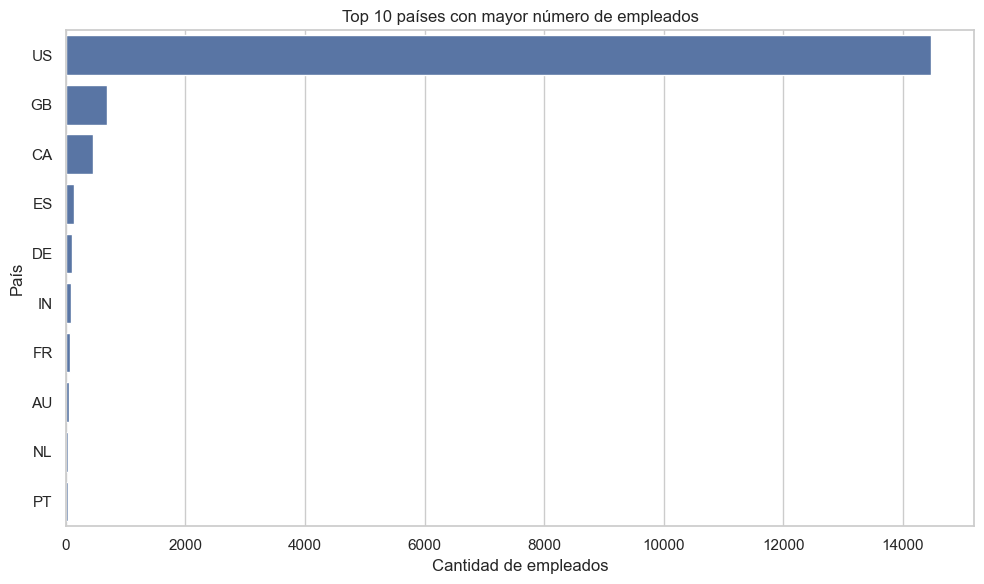

In [21]:
plt.figure(figsize=(10, 6))

# Top 10 países más frecuentes
top10 = df['Employee Residence'].value_counts().head(10)

sns.barplot(
    x=top10.values,
    y=top10.index
)

plt.title('Top 10 países con mayor número de empleados')
plt.xlabel('Cantidad de empleados')
plt.ylabel('País')
plt.tight_layout()
plt.show()


### Interpretación del Top 10 de países con mayor número de empleados

La gráfica muestra de forma clara qué países están más representados en el dataset.  
La distribución es extremadamente desigual, lo que es un aspecto importante a destacar en el EDA:

#### **1. Estados Unidos (US)**
- Domina completamente el dataset, con una cantidad **muy superior** al resto de países.
- Con más de 15.000 registros, representa la **gran mayoría** de los datos.
- Esto implica que muchas conclusiones del análisis podrían estar fuertemente influenciadas por el mercado laboral estadounidense.

#### **2. Reino Unido (GB) y Canadá (CA)**
- Son los siguientes países más presentes, pero con cifras muy inferiores a US.
- Aun así, tienen suficiente cantidad de registros para ofrecer información relevante.

#### **3. España (ES), Alemania (DE), India (IN)**
- Presentan cifras moderadas pero útiles para comparativas.

#### **4. Francia (FR), Australia (AU), Países Bajos (NL), Portugal (PT)**
- Aunque están dentro del top 10, sus cantidades son pequeñas en comparación con US.
- Es importante interpretar sus resultados salariales con “cautela” debido al tamaño de muestra reducido.

### **Conclusión general**
- El dataset está **fuertemente sesgado hacia Estados Unidos**.
- Esto significa que:
  - El análisis global del salario estará influenciado por el mercado laboral estadounidense.
  - Las comparaciones entre países deben tener en cuenta la diferencia abismal en el tamaño de las muestras.
  - Es recomendable presentar este sesgo en las conclusiones finales del EDA.

Esta gráfica es fundamental para entender la composición del dataset y cómo afecta a las interpretaciones posteriores.


### Salario en USD por tipo de trabajo (Top 10 puestos más frecuentes)

En esta gráfica analizamos cómo varía el salario según el tipo de trabajo (Job Title).  
Dado que existen muchísimos tipos diferentes, seleccionamos únicamente los **10 puestos más frecuentes**, lo que permite una visualización clara y manejable.

Usamos un **boxplot por tipo de trabajo**, que nos permite:
- Comparar la mediana salarial entre los roles más comunes.
- Observar la dispersión salarial dentro de cada rol.
- Identificar roles con alta variabilidad o presencia de outliers.
- Detectar los trabajos mejor remunerados entre los más frecuentes.

Esta gráfica aporta una visión directa de cómo la naturaleza del puesto influye en el nivel salarial.


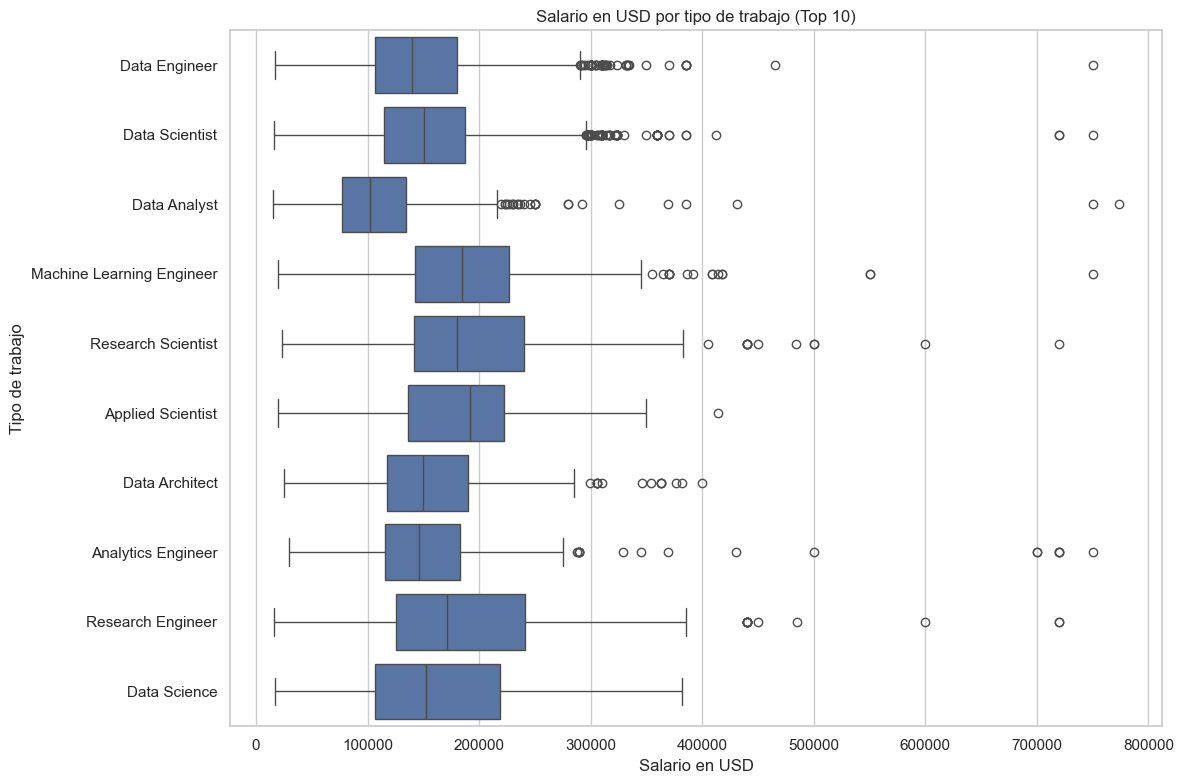

In [22]:
plt.figure(figsize=(12, 8))

# Top 10 trabajos más frecuentes
top10_jobs = df['Job Title'].value_counts().head(10).index

sns.boxplot(
    data=df[df['Job Title'].isin(top10_jobs)],
    y='Job Title',
    x='Salary In Usd',
    order=top10_jobs
)

plt.title('Salario en USD por tipo de trabajo (Top 10)')
plt.xlabel('Salario en USD')
plt.ylabel('Tipo de trabajo')
plt.tight_layout()
plt.show()


### Interpretación del salario en USD por tipo de trabajo (Top 10)

La gráfica permite comparar de forma clara cómo varían los salarios entre los 10 tipos de trabajo más frecuentes en el dataset.  
Algunas conclusiones importantes:

#### **1. Data Engineer**
- Uno de los roles con mayor mediana salarial.
- Presenta una distribución amplia con numerosos outliers altos.
- Perfil altamente demandado y bien remunerado.

#### **2. Data Scientist**
- Mediana salarial ligeramente inferior a la de Data Engineer.
- Rango intercuartílico relativamente estrecho, indicando salarios más consistentes.
- Algunos outliers por encima de 400.000 USD.

#### **3. Data Analyst**
- Es el papel con la mediana salarial más baja del top 10.
- Distribución mucho más comprimida.
- Tiene menos outliers extremos.
- Refleja que es un rol más junior o con menor barrera de entrada.

#### **4. Machine Learning Engineer**
- Mediana salarial alta, similar a Data Scientist.
- Más dispersión en los salarios, indicando diferencias entre niveles de especialización.
- Varios outliers por encima de 400.000 USD.

#### **5. Research Scientist / Applied Scientist**
- Ambos presentan salarios altos y mucha variabilidad.
- Presencia notable de outliers, propios de roles muy especializados.

#### **6. Data Architect**
- Salario medio–alto con distribución relativamente estable.
- Algunos outliers, aunque menos que Data Scientist o Data Engineer.

#### **7. Analytics Engineer**
- Salario moderado comparado con roles más técnicos.
- Variabilidad moderada y algunos outliers.

#### **8. Research Engineer**
- Tiene un rango salarial amplio y una mediana alta.
- También presenta muchos outliers, como es habitual en roles de investigación.

#### **9. Data Science**
- Aunque similar al rol de Data Scientist, presenta mayor dispersión.
- Salarios altos con varios outliers extraordinarios.

### **Conclusión general**
- Los roles de **Data Engineer, Data Scientist, Machine Learning Engineer, Research Scientist y Research Engineer** forman el grupo con salarios más altos.
- **Data Analyst** es el rol menos remunerado dentro de los más frecuentes.
- Los puestos más técnicos o especializados presentan más variabilidad y outliers.
- En general, la demanda y complejidad del rol están fuertemente relacionadas con su nivel salarial.

Esta gráfica es clave para entender el impacto del tipo de trabajo en la estructura salarial del dataset.


### Distribución del nivel de teletrabajo (Remote Ratio)

En esta gráfica analizamos cómo se distribuye el porcentaje de teletrabajo en el dataset.  
La columna *Remote Ratio* suele tomar valores discretos:

- **0%** → Trabajo completamente presencial  
- **50%** → Trabajo híbrido  
- **100%** → Trabajo completamente remoto  

Un **countplot** permite visualizar cuántos empleados pertenecen a cada una de estas modalidades.  
Esta gráfica es útil para entender qué tan extendido está el teletrabajo y si la muestra está equilibrada entre los distintos tipos de trabajo remoto.


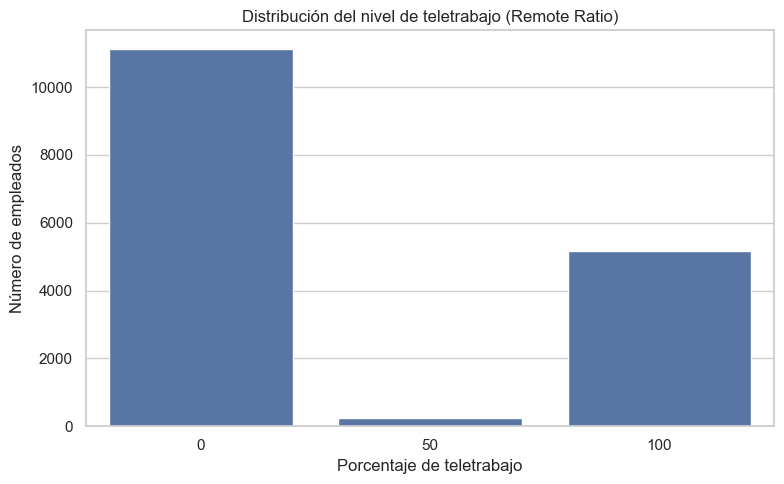

In [23]:
plt.figure(figsize=(8, 5))

# Orden lógico: 0, 50, 100
order = sorted(df['Remote Ratio'].unique())

sns.countplot(
    data=df,
    x='Remote Ratio',
    order=order
)

plt.title('Distribución del nivel de teletrabajo (Remote Ratio)')
plt.xlabel('Porcentaje de teletrabajo')
plt.ylabel('Número de empleados')
plt.tight_layout()
plt.show()


### Interpretación de la distribución del nivel de teletrabajo (Remote Ratio)

La gráfica muestra cómo se distribuye el porcentaje de teletrabajo en el dataset, y revela un patrón muy claro y desigual entre los tres niveles disponibles:

#### **1. 0% — Trabajo completamente presencial**
- Es, con diferencia, la categoría más numerosa: **más de 11.000 empleados**.
- Esto indica que, a pesar del auge del teletrabajo, la mayor parte del dataset corresponde a trabajos presenciales.
- Refuerza la idea de que muchos roles tecnológicos siguen requiriendo presencia física.

#### **2. 50% — Trabajo híbrido**
- Es la categoría menos representada, con apenas unos **centenares** de empleados.
- Prácticamente anecdótica en comparación con las otras dos.
- Sugiere que las empresas tienden a ofrecer modalidades “todo o nada”: o presencial completo o remoto completo.

#### **3. 100% — Trabajo completamente remoto**
- Es el segundo grupo más numeroso, con alrededor de **5.000 empleados**.
- Representa una parte significativa del dataset.
- Refleja el crecimiento del trabajo remoto en sectores tecnológicos y científicos.

### **Conclusión general**
- La mayoría de los roles siguen siendo presenciales.
- El teletrabajo total es bastante común, pero no supera al trabajo presencial.
- El modelo híbrido está poco extendido en esta muestra concreta.

Este patrón es importante para interpretar otras gráficas (como la relación entre salario y teletrabajo), ya que las categorías están muy desbalanceadas.


### Salario en USD según el tamaño de la empresa (Company Size)

En este paso analizamos cómo varía el salario en función del tamaño de la empresa.
La columna *Company Size* suele incluir categorías como:

- **S** → Small (empresa pequeña)  
- **M** → Medium (empresa mediana)  
- **L** → Large (empresa grande)

Representamos esta relación mediante un **boxplot**, lo que permite observar:

- La mediana salarial en cada tipo de empresa.  
- La dispersión de los salarios.  
- La presencia de outliers.  
- Si las empresas grandes pagan más que las pequeñas o medianas.

Esta gráfica es útil para comprender cómo influye el tamaño de la organización en las políticas salariales.


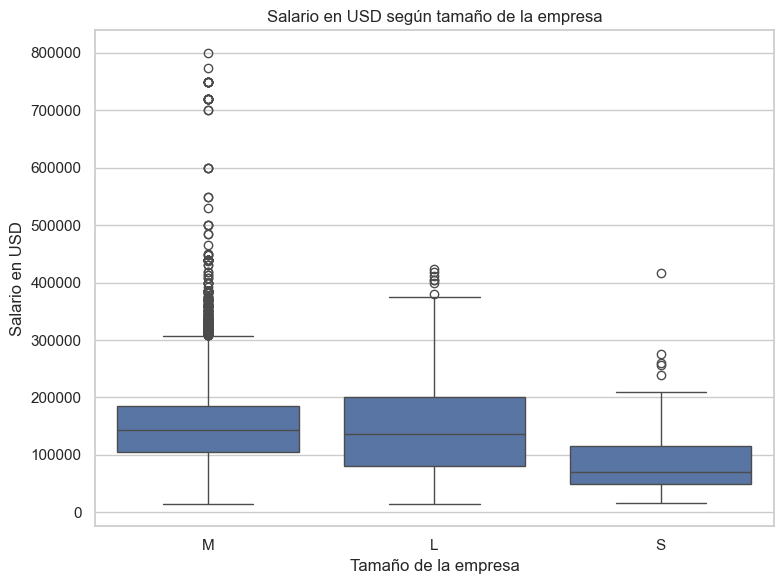

In [24]:
plt.figure(figsize=(8, 6))

order = df['Company Size'].value_counts().index

sns.boxplot(
    data=df,
    x='Company Size',
    y='Salary In Usd',
    order=order
)

plt.title('Salario en USD según tamaño de la empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Salario en USD')
plt.tight_layout()
plt.show()


### Interpretación del salario en USD según el tamaño de la empresa

La gráfica compara los salarios según el tamaño de la empresa, clasificadas como:

- **S** → Empresa pequeña  
- **M** → Empresa mediana  
- **L** → Empresa grande  

A partir del boxplot observamos lo siguiente:

#### **1. Empresas pequeñas (S)**
- Son las que **menos pagan** en promedio.
- La mediana está por debajo de **100.000 USD**.
- Presentan menos outliers extremos, lo que sugiere estructuras salariales más rígidas.
- El rango salarial es estrecho, típico de empresas con menor capacidad financiera.

#### **2. Empresas medianas (M)**
- Tienen una mediana superior a la de las pequeñas, alrededor de **130.000–140.000 USD**.
- Muestran muchos outliers muy altos (superan **600.000 USD**), lo que indica presencia de roles bien remunerados.
- Tienen la mayor cantidad de datos, lo cual también influye en la cantidad de outliers detectados.

#### **3. Empresas grandes (L)**
- Presentan una mediana salarial ligeramente superior a la de las medianas.
- Gran dispersión salarial: desde sueldos moderados hasta más de **350.000 USD**.
- Aunque no tienen tantos outliers como las medianas, muestran variedad de roles con salarios competitivos.

### **Conclusiones generales**
- Existe una tendencia clara: **a mayor tamaño de empresa, mayor nivel salarial**.
- Las empresas medianas muestran más outliers extremos, probablemente porque combinan roles muy variados con diferentes niveles de especialización.
- Las pequeñas empresas pagan menos y son más homogéneas, mientras que las grandes y medianas presentan estructuras salariales más diversas e impactadas por roles técnicos o directivos.

Este análisis refuerza la idea de que el tamaño de la organización es un factor significativo en la compensación salarial.


### Mapa geográfico del salario medio por país

En este paso representamos un **mapa mundial** donde cada país aparece coloreado según el 
**salario medio en USD** de los empleados que residen en él.  
Este tipo de visualización es muy útil para:

- Comparar rápidamente los niveles salariales entre países.
- Detectar regiones con salarios más altos o más bajos.
- Obtener una visión global del mercado laboral representado en el dataset.

Para construir el mapa utilizamos:

- **GeoPandas**, que permite trabajar con datos geográficos.
- Un shapefile mundial de "Natural Earth" incorporado en GeoPandas.
- Una unión (*merge*) entre la geometría de los países y los datos de nuestro dataset.

El resultado será un mapa donde los colores más oscuros representarán salarios medios más altos.


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


<Figure size 1400x1000 with 0 Axes>

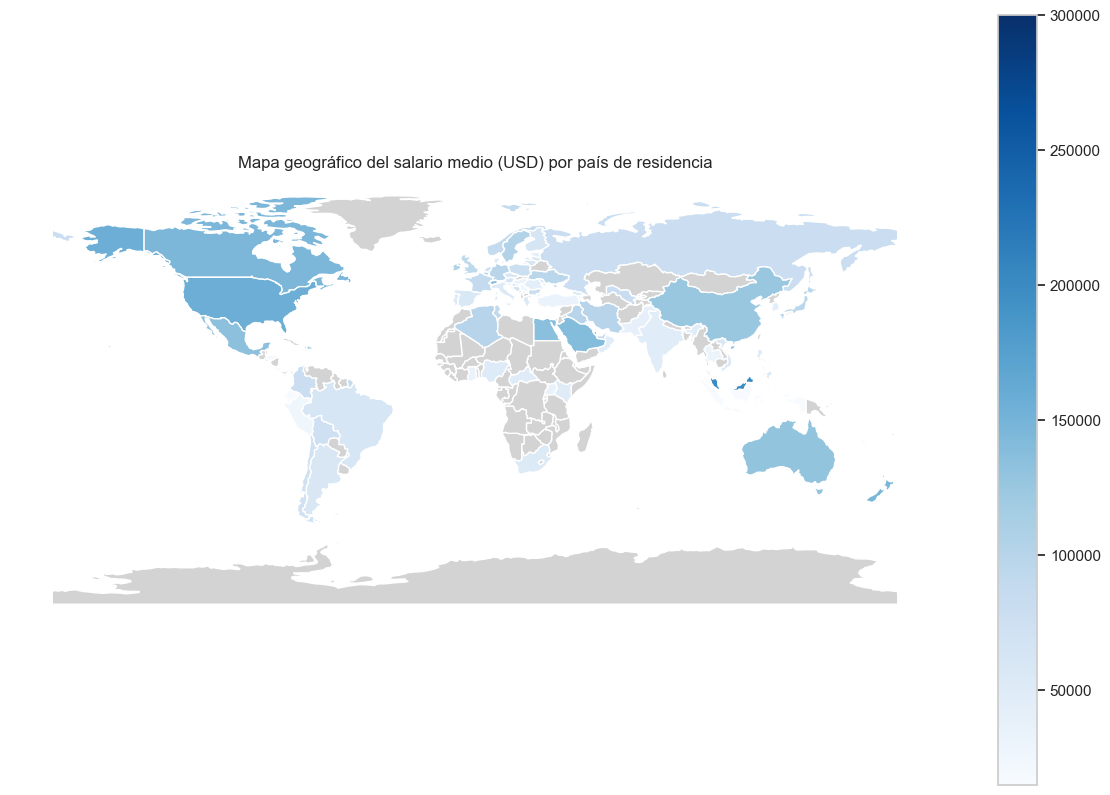

In [29]:

import geopandas as gpd

# Cargar geometría mundial desde Natural Earth (110m)
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

# Revisar columnas disponibles (útil para depuración)
print(world.columns)

# Agrupar el DataFrame para obtener salario medio por país
salary_by_country = df.groupby("Employee Residence")["Salary In Usd"].mean().reset_index()

# Convertir códigos a mayúsculas
salary_by_country["Employee Residence"] = salary_by_country["Employee Residence"].str.upper()

# Usar la columna correcta del shapefile (ISO_A2_EH)
world_merged = world.merge(
    salary_by_country,
    how="left",
    left_on="ISO_A2_EH",
    right_on="Employee Residence"
)

# Graficar el mapa
plt.figure(figsize=(14, 10))

world_merged.plot(
    column="Salary In Usd",
    cmap="Blues",
    legend=True,
    missing_kwds={"color": "lightgrey"},
    figsize=(15, 10)
)

plt.title("Mapa geográfico del salario medio (USD) por país de residencia")
plt.axis("off")
plt.show()


### Interpretación del mapa geográfico del salario medio por país

El mapa muestra cómo se distribuye el salario medio en USD según el país de residencia de los empleados.  
Los tonos más oscuros representan salarios más altos, mientras que los tonos claros indican salarios más bajos.  
Los países en gris no tienen registros en el dataset.

A partir del mapa observamos:

#### **1. América del Norte**
- **Estados Unidos** se destaca claramente como el país con el salario medio más alto del mundo dentro del dataset.
- **Canadá** también presenta salarios elevados, aunque algo por debajo de los de EE. UU.

#### **2. Europa**
- Países como **Reino Unido**, **Alemania**, **Francia**, **Países Bajos** y **Irlanda** muestran niveles salariales relativamente altos.
- **España**, **Portugal** y algunos países del este presentan salarios medios más bajos que los del norte de Europa.

#### **3. Oceanía**
- **Australia** muestra valores salariales elevados, comparables a los de países desarrollados de América y Europa.

#### **4. Asia**
- Los países asiáticos muestran una gran variabilidad:
  - **Singapur**, **Israel** y algunos países del Golfo Pérsico presentan salarios más altos.
  - Otros países como **India**, **Indonesia** o **Filipinas** muestran valores significativamente más bajos.

#### **5. Latinoamérica**
- Países como **Brasil**, **México**, **Argentina** o **Chile** muestran salarios medios más bajos comparados con Norteamérica y Europa.
- Esto está relacionado tanto con el nivel de desarrollo económico como con el tipo de roles predominantes en el dataset.

#### **Conclusión global**
- El mapa confirma una tendencia clara: los salarios más altos se concentran en países desarrollados, especialmente en **Estados Unidos**, Europa occidental y Australia.
- Los países en desarrollo presentan salarios significativamente menores.
- Esta visualización ayuda a contextualizar las diferencias salariales observadas en el dataset desde una perspectiva geográfica global.


### ¿Cómo podríamos estudiar y tratar los valores atípicos (outliers)?

Aunque en este análisis no vamos a modificar los datos originales, es importante explicar
qué métodos existen para detectar y tratar valores atípicos, ya que el salario presenta
muchos outliers especialmente en la cola superior.

Aquí describimos los métodos más comunes:

---

## 🔍 1. Método del **IQR (Interquartile Range)**
Es el método estándar para detectar outliers en datos numéricos.

1. Calcular:
   - Q1 = percentil 25  
   - Q3 = percentil 75  
   - IQR = Q3 − Q1  

2. Definir límites:
   - Límite inferior = Q1 − 1.5 × IQR  
   - Límite superior = Q3 + 1.5 × IQR  

3. Los valores fuera de ese rango se consideran outliers.

Este método es ideal para distribuciones asimétricas como la del salario.

---

## 🔍 2. Método de la **desviación estándar (Z-Score)**
Se usa especialmente para distribuciones más simétricas.

1. Calcular la media y la desviación estándar.  
2. Un valor se considera outlier si:

   \[
   |Z| > 3
   \]

Aunque este método asume normalidad, sigue siendo útil como referencia.

---

## 🔍 3. **Winsorización**
En lugar de eliminar los outliers, se *capan* a un valor máximo aceptable.

Ejemplo:
- Sustituir los valores superiores al percentil 99 por el valor del percentil 99.  
- Sustituir los inferiores al percentil 1 por el percentil 1.

Esto mantiene el tamaño del dataset y reduce el impacto de valores extremos.

---

## 🔍 4. Eliminación directa de outliers
Puede aplicarse cuando hay pocos valores atípicos y están claramente fuera del rango razonable.

Ejemplo: eliminar salarios > 1 millón USD.

No se recomienda si la presencia de salarios altos es una parte real del fenómeno.

---

## ✔️ Conclusión
En resumen, si quisiéramos limpiar el dataset podríamos:

- Detectar outliers mediante IQR o Z-Score  
- Analizar cómo afectan a la media y mediana  
- Decidir si los eliminamos o aplicamos winsorización  
- Comparar visualizaciones antes y después  

Aunque **no modificamos los datos originales**, es importante demostrar 
que conocemos las técnicas adecuadas para tratar valores atípicos en un EDA profesional.


### Relación entre tipo de trabajo (Job Title) y nivel de experiencia (Experience Level)

En este análisis exploramos cómo se distribuyen los diferentes niveles de experiencia dentro de los tipos de trabajo más frecuentes.  
Dado que existen muchos Job Titles distintos, utilizamos una tabla y un **heatmap** para representar únicamente los **10 trabajos más comunes**, mostrando:

- Cómo se reparte la experiencia dentro de cada rol.
- Qué trabajos suelen ser más junior (EN) o más senior (SE).
- Qué roles concentran mayor proporción de personal con experiencia avanzada (EX).
- Si existe alguna relación clara entre ciertos puestos y niveles de experiencia específicos.

El heatmap permite visualizar rápidamente patrones y comparaciones entre trabajos y niveles de experiencia.


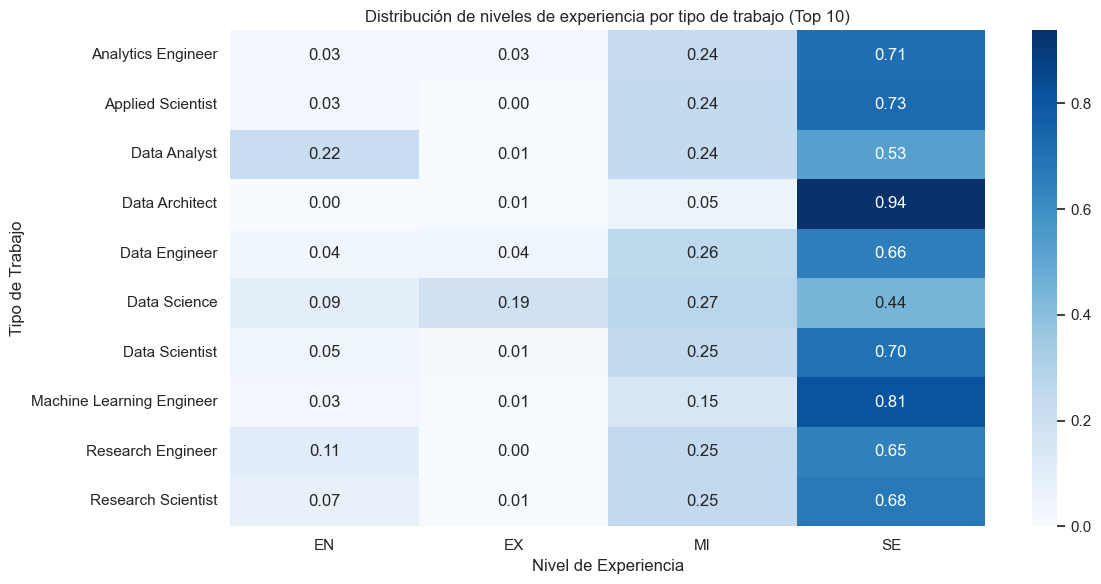

In [30]:
plt.figure(figsize=(12, 6))

# Selección de los 10 trabajos más frecuentes
top10_jobs = df['Job Title'].value_counts().head(10).index

# Tabla cruzada entre Job Title y Experience Level
cross_tab = pd.crosstab(
    df[df['Job Title'].isin(top10_jobs)]['Job Title'],
    df[df['Job Title'].isin(top10_jobs)]['Experience Level'],
    normalize='index'  # porcentajes por fila
)

# Heatmap de la tabla cruzada
sns.heatmap(
    cross_tab,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title('Distribución de niveles de experiencia por tipo de trabajo (Top 10)')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Tipo de Trabajo')
plt.tight_layout()
plt.show()


### Interpretación: Relación entre tipo de trabajo y nivel de experiencia

El heatmap muestra la distribución porcentual de los niveles de experiencia dentro de los 10 trabajos más frecuentes del dataset.  
Los valores indican qué proporción de empleados de cada rol pertenece a cada nivel de experiencia.

Podemos destacar varias conclusiones claras:

---

## 🔹 1. Roles altamente seniorizados (predominio SE)
Algunos trabajos muestran una concentración muy alta de profesionales con nivel **Senior (SE)**:

- **Data Architect (94%)**
- **Machine Learning Engineer (81%)**
- **Applied Scientist (73%)**
- **Data Scientist (70%)**
- **Research Scientist (68%)**
- **Research Engineer (65%)**
- **Data Engineer (66%)**

Estos roles son típicos de personas con formación avanzada, experiencia sólida y perfiles técnicos muy especializados.

---

## 🔹 2. Roles donde también hay presencia notable de Mid-level (MI)
Algunos trabajos tienen un reparto más equilibrado entre MI y SE:

- **Data Science**: 27% MI, 44% SE  
- **Analytics Engineer**: 24% MI, 71% SE  
- **Data Analyst**: 24% MI, 53% SE  

Esto refleja roles más variados, donde existen posiciones junior, intermedio y senior.

---

## 🔹 3. Roles con mayor presencia de Entry-level (EN)
El rol que destaca en este aspecto es:

- **Data Analyst**, con **22% EN**  
- También *Research Engineer* (11%) y *Data Science* (9%) tienen cierta presencia de juniors.

Esto indica que Data Analyst es una de las vías más comunes de entrada al sector de datos.

---

## 🔹 4. Categoría Executive (EX)
La categoría EX aparece muy poco en la mayoría de roles, destacando un poco solo en:

- **Data Science** (19%)

Esto es lógico: los roles ejecutivos no suelen aparecer en datasets de perfiles técnicos puros.

---

## ✔️ Conclusión general
- La mayoría de los roles técnicos del dataset están fuertemente asociados a niveles **Senior**.  
- Los roles que admiten mayor variedad de niveles (EN, MI y SE) son típicamente los menos especializados, como **Data Analyst**.  
- Los trabajos más avanzados (Data Architect, MLE, Applied Scientist, Research Scientist) exigen un alto nivel de experiencia.

Este análisis muestra claramente cómo el nivel de experiencia está fuertemente relacionado con la naturaleza del rol.



### Relación entre país de residencia del empleado y país donde se encuentra la empresa

En este análisis estudiamos cómo se relacionan dos variables clave:

- **Employee Residence** → país donde vive el empleado  
- **Company Location** → país donde se encuentra la empresa contratante  

Este cruce es especialmente interesante porque permite estudiar patrones de:

- Teletrabajo internacional  
- Deslocalización laboral  
- Contratación entre países  
- Movilidad profesional  
- Flujo global de talento

Para visualizar esta relación, construimos una **tabla cruzada normalizada** y la representamos con un 
**heatmap**, centrado en los 10 países más frecuentes (tanto de residencia como de empresas).

Este enfoque permite observar de forma clara:

- Qué países contratan a empleados de qué lugares  
- Si existe predominio de contrataciones locales  
- O si hay un fuerte componente internacional (residir en un país, trabajar para otro)


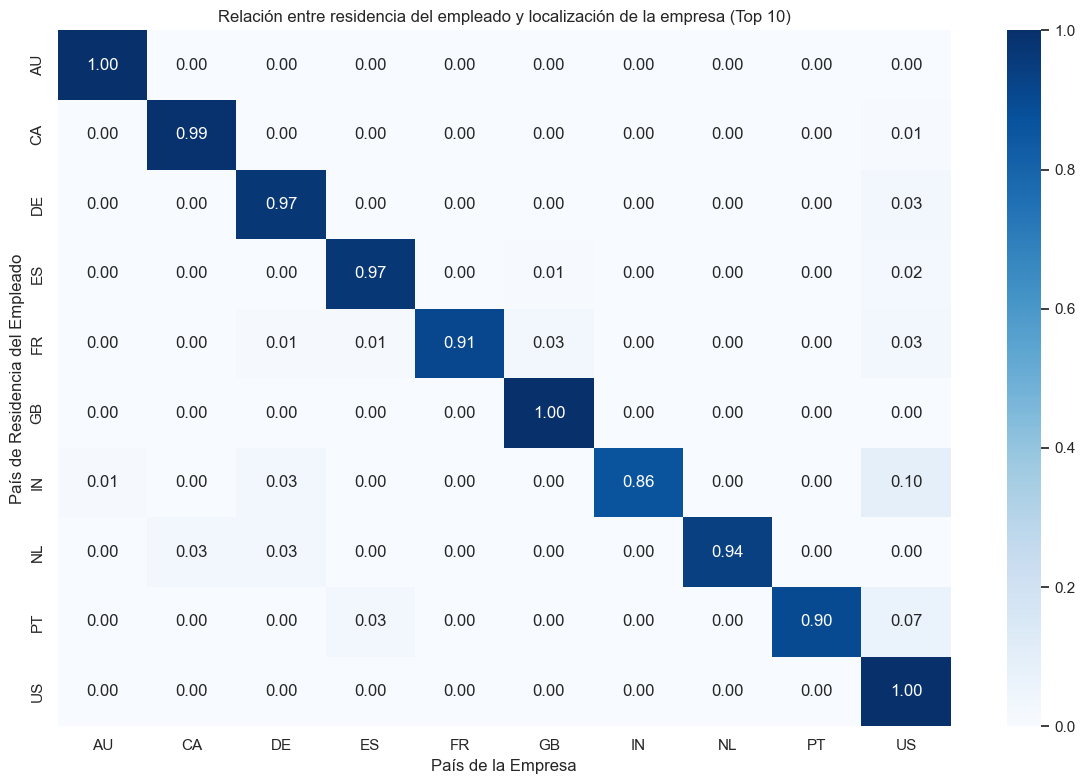

In [31]:
plt.figure(figsize=(12, 8))

# Selección de los países más frecuentes tanto en residencia como en empresas
top_residence = df['Employee Residence'].value_counts().head(10).index
top_company = df['Company Location'].value_counts().head(10).index

# Filtrado del DataFrame
df_filtered = df[
    (df['Employee Residence'].isin(top_residence)) &
    (df['Company Location'].isin(top_company))
]

# Tabla cruzada normalizada por fila
cross_tab_loc = pd.crosstab(
    df_filtered['Employee Residence'],
    df_filtered['Company Location'],
    normalize='index'
)

# Heatmap
sns.heatmap(
    cross_tab_loc,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title('Relación entre residencia del empleado y localización de la empresa (Top 10)')
plt.xlabel('País de la Empresa')
plt.ylabel('País de Residencia del Empleado')
plt.tight_layout()
plt.show()


### Interpretación: Relación entre país de residencia del empleado y país de la empresa

El heatmap muestra la proporción de empleados que **viven en un país** y **trabajan para una empresa ubicada en otro país**, considerando solo los 10 países más frecuentes del dataset.

Los valores representan porcentajes normalizados por fila, es decir:  
**para cada país de residencia, qué porcentaje trabaja para empresas de cada país.**

Los resultados son extremadamente claros:

---

## 🔹 1. Altísima concentración de contrataciones locales

En casi todos los países aparece un valor cercano al **1.00 (100%)** en la diagonal principal, lo que indica que:

- Los empleados **tienden a trabajar para empresas de su mismo país**.
- Existe poca movilidad laboral internacional real en el dataset.
- El teletrabajo transfronterizo no es tan común como podría parecer.

Ejemplos:
- AU → 1.00  
- CA → 0.99  
- DE → 0.97  
- ES → 0.97  
- GB → 1.00  
- US → 1.00  

Este patrón se repite de forma prácticamente uniforme.

---

## 🔹 2. Algunos países presentan leve conexión internacional

La única excepción parcial notable está en:

### **India (IN)**
- Un 86% trabaja para empresas en India.
- Un 10% trabaja para empresas de EE. UU.
- Un 3% para empresas de Alemania o Países Bajos.

Esto sugiere la presencia de outsourcing o teletrabajo hacia EE. UU.

### **Portugal (PT)**
- 90% trabaja para empresas portuguesas.
- Un 7% trabaja para empresas de EE. UU.
- Un 3% para empresas francesas.

Las diferencias siguen siendo pequeñas, pero más visibles que en otros países.

---

## 🔹 3. Predominio del empleo doméstico

El patrón más claro que emerge es que:

- La **contratación local es la norma**.  
- La **contratación internacional es la excepción**.  
- Los países con mayores economías (US, GB, CA, DE, FR) contratan casi exclusivamente talento local.

Este comportamiento podría deberse a:
- Regulaciones laborales  
- Diferencias de husos horarios  
- Preferencias de contratación  
- Restricciones fiscales  
- Políticas internas de empresas  

---

## ✔️ Conclusión general

El mapa demuestra que, en el dataset, la mano de obra técnica y de datos **trabaja mayoritariamente para empresas del mismo país donde reside**.

El cruce entre Employee Residence y Company Location confirma una baja movilidad internacional y un fuerte predominio de relaciones laborales nacionales.



### Relación entre tipo de contrato (Employment Type) y salario en USD

En este análisis estudiamos cómo varía el salario según el tipo de contrato de los empleados.
La columna **Employment Type** suele incluir:

- **FT** → Full Time (tiempo completo)  
- **PT** → Part Time (tiempo parcial)  
- **CT** → Contract (por contrato)  
- **FL** → Freelance  

Para visualizar esta relación, realizamos un **boxplot** que muestra:

- La mediana salarial en cada tipo de contrato.  
- La dispersión del salario dentro de cada categoría.  
- La presencia de outliers.  
- Qué tipo de contrato tiende a estar mejor o peor pagado.

Esto permite entender qué modalidad contractual se asocia con mejores condiciones salariales en el dataset.


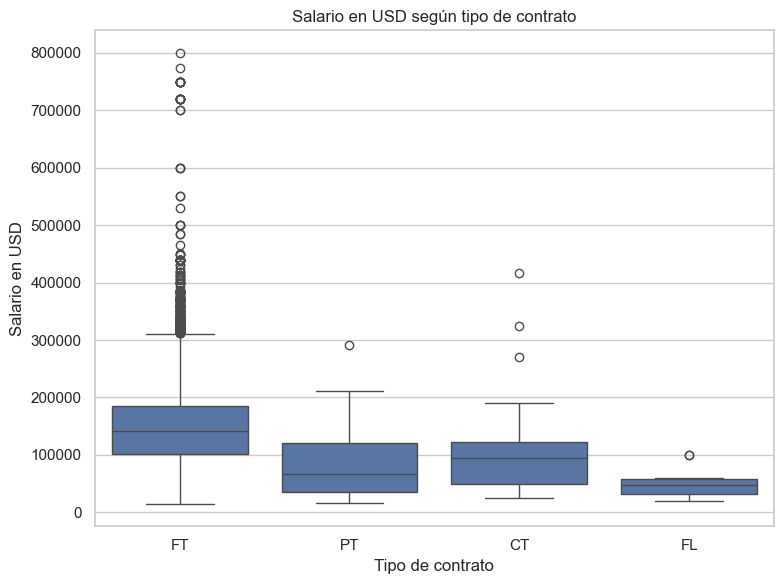

In [32]:
plt.figure(figsize=(8, 6))

order = df['Employment Type'].value_counts().index

sns.boxplot(
    data=df,
    x='Employment Type',
    y='Salary In Usd',
    order=order
)

plt.title('Salario en USD según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Salario en USD')
plt.tight_layout()
plt.show()


### Interpretación: Relación entre tipo de contrato y salario en USD

El boxplot muestra cómo varían los salarios en función del tipo de contrato.  
Las categorías más habituales son:

- **FT** → Full Time (tiempo completo)  
- **PT** → Part Time (tiempo parcial)  
- **CT** → Contract (contrato temporal o por proyecto)  
- **FL** → Freelance  

A partir de la gráfica podemos extraer conclusiones importantes:

---

## 🔹 1. Full Time (FT)
- Es la categoría **más numerosa** con diferencia.
- Presenta la mediana más alta, alrededor de **145.000 USD**.
- Tiene la mayor dispersión y la mayor cantidad de outliers.
- Los salarios extremos superan los **700.000 USD**, lo que refleja:
  - roles directivos, muy senior o altamente especializados,
  - y que la mayor parte del dataset corresponde a empleos a tiempo completo.

---

## 🔹 2. Part Time (PT)
- Tiene una mediana significativamente más baja, alrededor de **80.000–90.000 USD**.
- La dispersión es moderada.
- Existen algunos outliers (hasta ~300.000 USD), pero mucho menos frecuente.
- Refleja que los trabajos a tiempo parcial suelen asociarse a menor responsabilidad y menor salario.

---

## 🔹 3. Contract (CT)
- La mediana se sitúa alrededor de **100.000–110.000 USD**.
- Presenta más dispersión que PT.
- Hay outliers altos (hasta 400.000 USD), lo que es típico de:
  - contratos especializados,
  - consultores o ingenieros de proyectos,
  - salarios por proyecto muy elevados.

---

## 🔹 4. Freelance (FL)
- La categoría con salarios más bajos en general.
- Mediana alrededor de **50.000–60.000 USD**.
- Rango estrecho y pocos outliers.
- Indica que el trabajo freelance representado aquí no es el de consultores senior de alto nivel, sino perfiles más modestos o de países con menor salario medio.

---

## ✔️ Conclusión general

- **FT** es el tipo de contrato mejor remunerado y el que concentra casi todos los salarios extremadamente altos.
- **PT** y **FL** muestran niveles salariales menores y menor dispersión.
- **CT** se sitúa en un término medio, propio de trabajos especializados o temporales.
- La estructura salarial refleja la típica jerarquía laboral:  
  **FT > CT > PT > FL**

Este análisis es fundamental para entender cómo la modalidad contractual influye en la compensación económica dentro del dataset.
